<a href="https://colab.research.google.com/github/yannick5000/Fake-News-Detector-Covid-19-vaccine/blob/main/Project_FakeNews(Machine-Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Health-related fakenews detector – Project Work - Machine Learning Group**



Getting started

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/ColabNotebooks/data/

[Errno 2] No such file or directory: 'drive/MyDrive/ColabNotebooks/data/'
/content


In [5]:
#Loading in data as dataframe
import pandas as pd
import string
import numpy as np

df = pd.read_csv("statements3.csv",index_col="Index")

In [6]:
#Removing punctuation from data frame
list_punctuation = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '–', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '®', '„', '“', '≥', '≤', '€']
def remove_punctuation_df(input):
  input = input.replace("[^\w\s]","")
  input = ["".join(letter for letter in word if letter not in string.punctuation)for word in input]
  input = [word.translate(string.punctuation) for word in input]
  input = ["".join(letter for letter in word if letter not in list_punctuation)for word in input]
  return input

In [7]:
df["Statement"] = df[["Statement"]].apply(remove_punctuation_df)

In [9]:
df.head()

,Statement,Source,Source (URL),Date + time,True/False,Evidence (why true?),Category
Index,,,,,,,
659,Der Impfstoff kann eine Covid19Erkrankung vers...,BR24,https://www.br.de/nachrichten/wissen/fake-news...,2021-07-19 16-21,False,Lack of understanding complex medical/biologic...,Consequences of vaccination
438,Vorläufige Erkenntnisse deuten darauf hin dass...,RKI,https://www.rki.de/SharedDocs/FAQ/COVID-Impfen...,2022-05-24,True,NaN,NaN
842,Bewohner eines Pfelgeheims der Diakonie in Sac...,Facts For Friends,https://www.factsforfriends.de/fact/5ff85b479a...,2021-01-08,False,Falsche Behauptung,Vaccination mandate
498,Kinder mit Vorerkrankungen sollen weiterhin ei...,RKI,https://www.rki.de/SharedDocs/FAQ/COVID-Impfen...,2022-06-11,True,NaN,NaN
490,Darüber hinaus sind Abstand halten Maske trage...,RKI,https://www.rki.de/SharedDocs/FAQ/COVID-Impfen...,2022-06-03,True,NaN,NaN


In [10]:
#Removing punctuation from user's sentence
other_punctuation = '–®„“≥≤€'
our_punctuation = string.punctuation + other_punctuation
def remove_punctuation_user(input):
  for character in our_punctuation:
    input = input.replace(character, '')
  return input

In [11]:
example = "Der COVID-19-Impfstoff Spikevax® von Moderna ist jetzt in Europa für die Anwendung bei Kindern ab 6 Jahren zugelassen worden."
example = remove_punctuation_user(example)
print(example)

Der COVID19Impfstoff Spikevax von Moderna ist jetzt in Europa für die Anwendung bei Kindern ab 6 Jahren zugelassen worden


In [12]:
#Setting target variable
df_drop = pd.get_dummies(df.iloc[:,0])
frames = [df_drop,df["True/False"]]
df_final = pd.concat(frames, axis=1)       
df_final 
df_final.tail()  
df_target = df["True/False"].eq(1).groupby(df["Statement"]).mean().reset_index()

In [13]:
df_target

,Statement,True/False
0,An COVID würden fast nur diejenigen Menschen ...,0.0
1,Azithromycin kann das CovidVirus abtöten,0.0
2,Bleichmittel zu trinken um das Virus im Körpe...,0.0
3,Chloroquin kann das CovidVirus abtöten,0.0
4,Das Virus wurde künstlich hergestellt und die...,0.0
...,...,...
986,mRNAImpfstoffe können unser Erbgut verändern,0.0
987,mRNAImpfstoffe verändern die DNA im Körper der...,0.0
988,okalreaktionen Schmerzen an der Einstichstelle...,1.0
989,Ähnlich wie bei Erwachsenen ist der Schutz vor...,1.0


Preprocessing

In [14]:
#Preprocessing for dataframe
def preprocess_df(input):
  input = input.apply(lambda x: x.lower())   #lower case
  input = input.apply(lambda x: x.strip())   #remove whitespace left and right
  return input

In [15]:
df["Statement"] = df[["Statement"]].apply(preprocess_df)

In [16]:
df.head()

,Statement,Source,Source (URL),Date + time,True/False,Evidence (why true?),Category
Index,,,,,,,
659,der impfstoff kann eine covid19erkrankung vers...,BR24,https://www.br.de/nachrichten/wissen/fake-news...,2021-07-19 16-21,False,Lack of understanding complex medical/biologic...,Consequences of vaccination
438,vorläufige erkenntnisse deuten darauf hin dass...,RKI,https://www.rki.de/SharedDocs/FAQ/COVID-Impfen...,2022-05-24,True,NaN,NaN
842,bewohner eines pfelgeheims der diakonie in sac...,Facts For Friends,https://www.factsforfriends.de/fact/5ff85b479a...,2021-01-08,False,Falsche Behauptung,Vaccination mandate
498,kinder mit vorerkrankungen sollen weiterhin ei...,RKI,https://www.rki.de/SharedDocs/FAQ/COVID-Impfen...,2022-06-11,True,NaN,NaN
490,darüber hinaus sind abstand halten maske trage...,RKI,https://www.rki.de/SharedDocs/FAQ/COVID-Impfen...,2022-06-03,True,NaN,NaN


In [17]:
#Preprocessing for user's sentence
def preprocess_user(input):
  input = input.lower()   #lower case
  inout = input.strip()   #remove whitespace left and right
  return input

In [18]:
example = preprocess_user(example)
print(example)

der covid19impfstoff spikevax von moderna ist jetzt in europa für die anwendung bei kindern ab 6 jahren zugelassen worden


In [ ]:
#Tokenization: bringing sentences into world
import nltk
nltk.download("punkt")
nltk.download("wordnet")

In [20]:
#Tokenization for dataframe
def tokenize_df(input):
  input = input.apply(lambda x: nltk.word_tokenize(x))
  return input

In [21]:
df["Statement"] = df[["Statement"]].apply(tokenize_df)

In [22]:
df.head()

,Statement,Source,Source (URL),Date + time,True/False,Evidence (why true?),Category
Index,,,,,,,
659,"[der, impfstoff, kann, eine, covid19erkrankung...",BR24,https://www.br.de/nachrichten/wissen/fake-news...,2021-07-19 16-21,False,Lack of understanding complex medical/biologic...,Consequences of vaccination
438,"[vorläufige, erkenntnisse, deuten, darauf, hin...",RKI,https://www.rki.de/SharedDocs/FAQ/COVID-Impfen...,2022-05-24,True,NaN,NaN
842,"[bewohner, eines, pfelgeheims, der, diakonie, ...",Facts For Friends,https://www.factsforfriends.de/fact/5ff85b479a...,2021-01-08,False,Falsche Behauptung,Vaccination mandate
498,"[kinder, mit, vorerkrankungen, sollen, weiterh...",RKI,https://www.rki.de/SharedDocs/FAQ/COVID-Impfen...,2022-06-11,True,NaN,NaN
490,"[darüber, hinaus, sind, abstand, halten, maske...",RKI,https://www.rki.de/SharedDocs/FAQ/COVID-Impfen...,2022-06-03,True,NaN,NaN


In [23]:
#Tokenization for user's sentence
def tokenize_user(input):
  input = nltk.word_tokenize(input)
  return input

In [24]:
example = tokenize_user(example)
print(example)

['der', 'covid19impfstoff', 'spikevax', 'von', 'moderna', 'ist', 'jetzt', 'in', 'europa', 'für', 'die', 'anwendung', 'bei', 'kindern', 'ab', '6', 'jahren', 'zugelassen', 'worden']


In [ ]:
#Importing the stop words
#German stop word library from nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

stopWordsGerman = stopwords.words("german")
len(stopWordsGerman)   #232 words

In [26]:
#Removing stop words in dataframe
def remove_stopwords_df(input):
  input = input.apply(lambda element: [word for word in element if not word in stopWordsGerman])
  input = input.apply(lambda x: ' '.join([word for word in x]))   #You can join the list of above words to create a sentence without stop words, as shown below:
  return input

In [27]:
df["Statement"] = df[["Statement"]].apply(remove_stopwords_df)

In [28]:
df.head()

,Statement,Source,Source (URL),Date + time,True/False,Evidence (why true?),Category
Index,,,,,,,
659,impfstoff covid19erkrankung verschlimmern stat...,BR24,https://www.br.de/nachrichten/wissen/fake-news...,2021-07-19 16-21,False,Lack of understanding complex medical/biologic...,Consequences of vaccination
438,vorläufige erkenntnisse deuten darauf longcovi...,RKI,https://www.rki.de/SharedDocs/FAQ/COVID-Impfen...,2022-05-24,True,NaN,NaN
842,bewohner pfelgeheims diakonie sachsen coronaim...,Facts For Friends,https://www.factsforfriends.de/fact/5ff85b479a...,2021-01-08,False,Falsche Behauptung,Vaccination mandate
498,kinder vorerkrankungen sollen weiterhin grundi...,RKI,https://www.rki.de/SharedDocs/FAQ/COVID-Impfen...,2022-06-11,True,NaN,NaN
490,darüber hinaus abstand halten maske tragen lüf...,RKI,https://www.rki.de/SharedDocs/FAQ/COVID-Impfen...,2022-06-03,True,NaN,NaN


In [29]:
#Removing stop words in user's sentence
def remove_stopwords_user(input):
  new_list = list()
  for word in input:
    if not word in stopWordsGerman:
      new_list.append(word)
  sentence_withoutstopwords = ' '.join(new_list)
  return sentence_withoutstopwords

In [30]:
example = remove_stopwords_user(example)
print(example)

covid19impfstoff spikevax moderna europa anwendung kindern ab 6 jahren zugelassen worden


In [ ]:
#Saving data after preprocessing part 1 as "cleanedstatements.csv"
from google.colab import files
df.to_csv('cleanedstatements.csv')
files.download('cleanedstatements.csv')

Lemmatization

In [ ]:
#Lemmatization
#Preparation
!pip install -U spacy                       #to install spacy-lemmatizer
!python -m spacy download de_core_news_sm   #to download the German language module

import spacy
nlp = spacy.load("de_core_news_sm")

nlp.pipe_names   #to define specific lemmas yourself

ar = nlp.get_pipe('attribute_ruler')

#Phrases related to covid
ar.add([[{"TEXT":"vakzinen"}],[{"TEXT":"vakzine"}],[{"TEXT":"vaccination"}],[{"TEXT":"covid19impfung"}],[{"TEXT":"covidimpfung"}],[{"TEXT":"covid19schutzimpfung"}],[{"TEXT":"covidschutzimpfung"}],[{"TEXT":"coronaschutzimpfung"}]],{"LEMMA":"impfung"})
ar.add([[{"TEXT":"impfstoffe"}],[{"TEXT":"impfstoffen"}]],{"LEMMA":"impfstoff"})
ar.add([[{"TEXT":"covid19"}],[{"TEXT":"sarscov2"}]],{"LEMMA":"corona"})
ar.add([[{"TEXT":"coronaerkrankung"}],[{"TEXT":"coronainfektion"}],[{"TEXT":"covid19infektion"}],[{"TEXT":"sarscov2infektion"}]],{"LEMMA":"corona"})
ar.add([[{"TEXT":"covid19virus"}],[{"TEXT":"sarscov2virus"}], [{"TEXT":"coronaviren"}]], {"LEMMA":"coronavirus"})
ar.add([[{"TEXT":"covid19impfstoff"}],[{"TEXT":"covidimpfstoffe"}],[{"TEXT":"covidimpfstoffe"}]],{"LEMMA":"coronaimpfstoff"})
ar.add([[{"TEXT":"covid19auffrischimpfung"}],[{"TEXT":"covidauffrischimpfung"}],[{"TEXT":"coronaauffrischimpfung"}],[{"TEXT":"auffrischungsimpfung"}],[{"TEXT":"covid19auffrischungsimpfung"}],[{"TEXT":"covidiauffrischungsimpfung"}],[{"TEXT":"coronaauffrischungsimpfung"}]],{"LEMMA":"auffrischimpfung"})

#Other phrases
ar.add([[{"TEXT":"altersgruppe"}]],{"LEMMA":"altersklasse"})
ar.add([[{"TEXT":"myokarditis"}],[{"TEXT":"myokarditiden"}]],{"LEMMA":"herzmuskelentzündung"})
ar.add([[{"TEXT":"todesfälle"}],[{"TEXT":"sterbefall"}],[{"TEXT":"sterbefälle"}],[{"TEXT":"sterberate"}],[{"TEXT":"todesrate"}]],{"LEMMA":"todesfall"})
ar.add([[{"TEXT":"fehlgeburten"}],[{"TEXT":"spontanabort"}],[{"TEXT":"fehlgeburt"}],[{"TEXT":"stillgeburt"}],[{"TEXT":"totgeburt"}]],{"LEMMA":"fehlgeburt"})


In [33]:
df = pd.read_csv("cleanedstatements.csv", index_col='Index')

In [34]:
def lemmatize_df(input):
  lemmtext = []
  doc = nlp(input)
  input = [x.lemma_ for x in doc]
  lemmtext.append(input)
  return input

In [35]:
df["Statement"] = df["Statement"].apply(lemmatize_df)
df["Statement"] = df["Statement"].apply(lambda x: ' '.join([word for word in x]))
df["Statement"] = df["Statement"].apply(lambda x: x.lower())   #Through lemmatization, words with capital letters reappeared, so make everything lower case again

In [36]:
df.head()

,Statement,Source,Source (URL),Date + time,True/False,Evidence (why true?),Category
Index,,,,,,,
659,impfstoff covid19erkrankung verschlimmern stat...,BR24,https://www.br.de/nachrichten/wissen/fake-news...,2021-07-19 16-21,False,Lack of understanding complex medical/biologic...,Consequences of vaccination
438,vorläufig erkenntnisse deuten darauf longcovid...,RKI,https://www.rki.de/SharedDocs/FAQ/COVID-Impfen...,2022-05-24,True,NaN,NaN
842,bewohner pfelgeheim diakonie sachs coronaimpfu...,Facts For Friends,https://www.factsforfriends.de/fact/5ff85b479a...,2021-01-08,False,Falsche Behauptung,Vaccination mandate
498,kind vorerkrankungen sollen weiterhin grundimm...,RKI,https://www.rki.de/SharedDocs/FAQ/COVID-Impfen...,2022-06-11,True,NaN,NaN
490,darüber hinaus abstand halten maske tragen lüf...,RKI,https://www.rki.de/SharedDocs/FAQ/COVID-Impfen...,2022-06-03,True,NaN,NaN


In [37]:
def lemmatize_user(input):
  lemmtext = []
  doc = nlp(input)
  input = [x.lemma_ for x in doc]
  lemmtext.append(input)
  lemmatized_sen = ' '.join(input)
  lemmatized_sen = lemmatized_sen.lower()   #Through lemmatization, words with capital letters reappeared, so make everything lower case again
  return lemmatized_sen

In [38]:
example = lemmatize_user(example)
print(example)

coronaimpfstoff spikevax moderna europa anwendung kind ab 6 jahr zulassen werden


In [ ]:
#Saving data after lemmatization part 1 as "lemmatizedstatements.csv"
from google.colab import files
df.to_csv('lemmatizedstatements.csv')
files.download('lemmatizedstatements.csv')

Word Cloud

In [ ]:
#Word Cloud
#Installing libraries needed
!pip install numpy scipy matplotlib ipython jupyter pandas sympy nose wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd

#If you want to look at Word Cloud in Colab, the following code is needed
!pip install mpld3
import mpld3
import mpld3
from mpld3 import plugins

In [42]:
comment_words = '' 
from nltk.corpus import stopwords
stopset = stopwords.words('german')

In [43]:
df = pd.read_csv('lemmatizedstatements.csv')
values = df['Statement'].values

for val in values: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += ' '.join(tokens)+' '

In [44]:
facecolor = 'black'
wordcloud = WordCloud(width=1000, height=600, 
            background_color=facecolor, 
            stopwords=stopset,
            min_font_size=10).generate(comment_words)

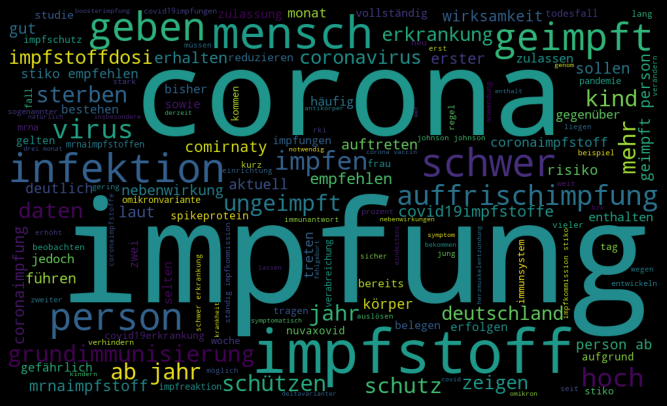

In [45]:
plt.figure(figsize=(10,6), facecolor=facecolor) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad=2)

In [ ]:
#Saving Word Cloud in Colab
filename = 'wordcloud'
plt.savefig(filename+'.png', facecolor=facecolor)
files.download('wordcloud.png')

Machine Learning Model: Logistic Regression

In [ ]:
#Preparing fake news detector: training model with data

In [ ]:
#Following code is from: https://www.kaggle.com/code/shahkan/text-classification-using-logistic-regression/data
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

In [48]:
dataset = pd.read_csv('lemmatizedstatements.csv')

In [49]:
#Some preprocessing again
nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("german")
#sowas wie im Folgenden müssen wir auch noch machen: Alle Schritte von oben (Lemmatisierung, Whitespace entfernen etc.) irgendwie in einer neuen Spalte abspeichern, damit wir ein "cleaned"-set haben
dataset['cleaned'] = dataset['Statement'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
#Stopwords are the same as above
vectorizer = TfidfVectorizer(min_df= 3, stop_words=stopWordsGerman, sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(dataset['cleaned']).toarray()
final_features.shape

(999, 1028)

In [51]:
dataset['True/False']

0      False
1       True
2      False
3       True
4       True
       ...  
994     True
995     True
996     True
997     True
998    False
Name: True/False, Length: 999, dtype: bool

In [53]:
#Alternative Logistic Regression model with code from: https://www.analyticsvidhya.com/blog/2021/04/beginners-guide-to-logistic-regression-using-python/ and': https://www.kaggle.com/code/shahkan/text-classification-using-logistic-regression/notebook

from sklearn.linear_model import LogisticRegression
X = dataset['cleaned']   #input
Y = dataset['True/False']  #output
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=708)),
                     ('clf', LogisticRegression(random_state=42))])
model = pipeline.fit(X_train, y_train)
predictions = model.predict(X_test)
probability = model.predict_proba(X)
print(probability)   #left column of matrix: probability of predicted output being 0, right column: probability of predicted output being 1; rows: per each of our statements

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, 
predictions))

[[0.59952059 0.40047941]
 [0.32333835 0.67666165]
 [0.83293742 0.16706258]
 ...
 [0.2180298  0.7819702 ]
 [0.71231193 0.28768807]
 [0.74815644 0.25184356]]
              precision    recall  f1-score   support

       False       0.84      0.79      0.82       149
        True       0.81      0.85      0.83       151

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

[[118  31]
 [ 22 129]]


In [54]:
##one way to improve our model
#set parameter C to 10 instead of 0 (by default)
# model = LogisticRegression(C=10)
#that is to avoid overfitting (model knows data too well)
#explanation of parameter C here: https://realpython.com/logistic-regression-python/#regularization
#but when I tested, values for accuracy (precision, recall, etc.) were exactly the same (?)

Creating Fake News Detector with Anvil

In [ ]:
!pip install -Uqq fastai --upgrade
!pip install -Uqq fastcore --upgrade
!pip install -Uqq pandas==1.1.0
!pip install -Uqq anvil-uplink

In [56]:
from fastai.text.all import load_learner
import anvil.server

In [57]:
anvil.server.connect("TKEAZQWDWYAZVEHF4EW3TN5F-XGIH7W2J3XZSQW46")
#TKEAZQWDWYAZVEHF4EW3TN5F-XGIH7W2J3XZSQW46 - with logo
#N4LVVOIXMFFCGBWSORSS45XN-MVK3UE6YWHZTOI3C

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [58]:
@anvil.server.callable
def predict(input):
  input = remove_punctuation_user(input)   #the different kinds of preprocessing steps also have to be applied to our user's input sentence - if not, the machine learning model will not understand the sentence and will not be able to categorize it into True or False
  input = preprocess_user(input)
  input = tokenize_user(input)
  input = remove_stopwords_user(input)
  input = lemmatize_user(input)
  input = [input]
  prediction = model.predict(input)
  correct = "The statement is correct"
  false = "The statement is false"
  if prediction == 0:
    preds = correct
  else:
    preds = false
  return preds

          #For demo:
          #Correct statement #1: "Telefonisch, per Mail, online oder ganz ohne Anmeldung – wo und wie Sie die Corona-Schutzimpfung erhalten können, unterscheidet sich je nach Bundesland und Region."
          #Correct statement #2: "mRNA-Impfstoffe schützen vor schweren Verläufen."
          #Correct statement #3: "Mögliche Nebenwirkungen nach einer Impfung sind Kopfschmerzen oder Schmerzen an der Einstichstelle."
          #False statement #1: "mRNA-Impfstoffe verändern die DNA im Körper der geimpften Person."
          #False statement #2: "Nach einer Impfung ist der Krankheitsverlauf schwerer als ohne Impfung."
          #False statement #3: "Coronaimpfungen verursachen eine Fehlgeburt."